In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import bz2
import re
import os
import gc

In [2]:
train_file = bz2.BZ2File('train.ft.txt.bz2')
test_file = bz2.BZ2File('test.ft.txt.bz2')

In [3]:
def load_extract(file):
    texts, labels = [], [] 
    for line in file:
        x = line.decode('utf-8')  # decode binary to string
        labels.append(int(x[9]) - 1)  # extract labels
        texts.append(x[10:].strip())  # extract texts
    print('Done !')
    return np.array(labels), texts

In [4]:
train_labels, train_texts = load_extract(train_file)
test_labels, test_texts = load_extract(test_file)

Done !
Done !


In [5]:

train_texts[0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [6]:
train_labels[:100]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [7]:
test_labels[:100]

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [8]:
import nltk
from nltk.corpus import stopwords

In [9]:
def clean_texts(texts):
    stwords = stopwords.words('english')
    l = len(texts)/10
    temp_texts = []
    for i in range(len(texts)):
        text = re.sub('\d','0',texts[i])
        if 'www.' in text or 'http:' in text or 'https:' in text or '.com' in text: # remove links and urls
            text = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", " ", text)
        
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stwords] # remove stopwords 
        text = ' '.join(text)
        temp_texts.append(text)
        if i%l==0:
            print('--'+str(int(i/l)*10)+'%', end='')
    print('--100%--Done !')
    return temp_texts

In [10]:
print('Processing Training data')
train_texts = clean_texts(train_texts)
print('\nProcessing Test data')
test_texts = clean_texts(test_texts)

Processing Training data
--0%--10%--20%--30%--40%--50%--60%--70%--80%--90%--100%--Done !

Processing Test data
--0%--10%--20%--30%--40%--50%--60%--70%--80%--90%--100%--Done !


In [11]:
train_texts[0]

'stuning even non gamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen'

<AxesSubplot: ylabel='count'>

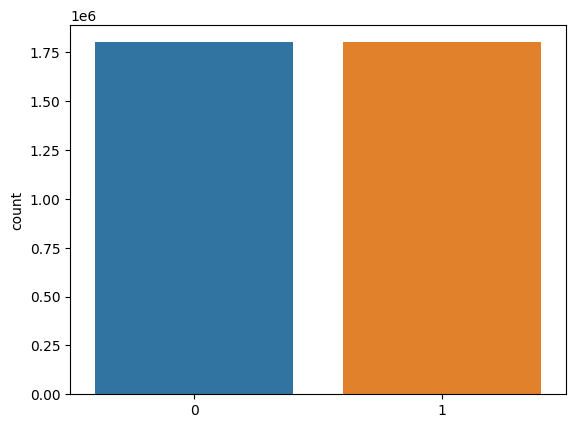

In [12]:
sns.countplot(x=train_labels)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

print('Fitting data...')
count_vect = CountVectorizer()
count_vect.fit(train_texts) ; print('fit complete !')

print('tranforming training set...')
train_texts_vec = count_vect.transform(train_texts)

print('tranforming test set...')
test_texts_vec = count_vect.transform(test_texts)

Fitting data...
fit complete !
tranforming training set...
tranforming test set...


In [16]:
# from sklearn.naive_bayes import MultinomialNB
# nb = MultinomialNB()
# nb.fit(train_texts_vec, train_labels)

In [17]:
# y_pred = nb.predict(test_texts_vec)

In [18]:
# from sklearn.metrics import accuracy_score
# print('Accuracy:', accuracy_score(test_labels, y_pred))


######accuracy is 0.84

In [19]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(n_jobs=-1, max_iter=150)
lr_model.fit(train_texts_vec, train_labels)

LogisticRegression(max_iter=150, n_jobs=-1)

In [20]:
pred_lr = lr_model.predict(test_texts_vec)

In [37]:
test_list_1 =np.array(["This product is so exciting i love this product ","The product is so bad","this product is very good i am going to love this","what the shit is this product " ])
def testing_prediction(test_list_2):
    print ("Preprocessing the array data.....")      
    test_list_2 = clean_texts(test_list_2)
    print ("CountVectorizer .....")
    test_list_vec = count_vect.transform(test_list_2)
    y_pred = lr_model.predict(test_list_vec)
    print (y_pred)
testing_prediction(test_list_1)

Preprocessing the array data.....
--0%--100%--Done !
CountVectorizer .....
[1 0 1 0]


In [40]:
sample = test_texts[100]
print(sample)

sample_vec = count_vect.transform([sample])
pred = lr_model.predict(sample_vec)
print('\npredicted label:',pred[0])
print('actual label:', test_labels[100])


problems munchkin version ditto complaints separate easily either unscrewing prizing cheap flimsy leaks water also gasket looking something else hoping reviewers give honest good advice almost identical product munchkin

predicted label: 0
actual label: 0


In [ ]:
import pickle

pickle.dump(lr_model, open('model.pkl', 'wb'))
pickle.dump(count_vect, open('countvect.pkl', 'wb'))

In [ ]:
import joblib
  
joblib.dump(lr_model, 'model_joblib.pkl')
joblib.dump(count_vect, 'countvect_joblib.pkl')

['countvect_joblib.pkl']